In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml

In [3]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
df = pd.concat([X, y], axis=1)
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None,0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None,0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None,0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None,0


In [4]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'survived'],
      dtype='object')

In [5]:
train_cols = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

X = df[train_cols]
y = df['survived']
y.value_counts()

0    809
1    500
Name: survived, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

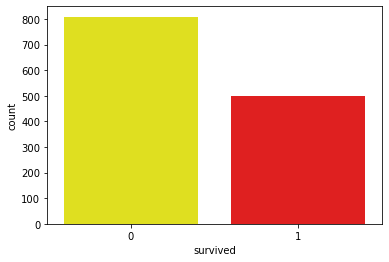

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

colors=["yellow", "red"]
sns.countplot('survived', data=df, palette=colors)

In [7]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['survived'])
df2 = pd.concat([X_samp, y_samp], axis=1)

In [8]:
X = df2[train_cols]
y = df2['survived']
y.value_counts()

0    500
1    500
Name: survived, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

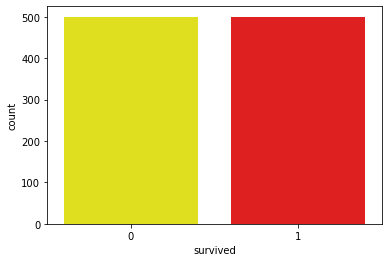

In [9]:
colors=["yellow", "red"]
sns.countplot('survived', data=df2, palette=colors)

In [10]:
X = X_samp[train_cols]
y = y_samp['survived']

In [ ]:
# 데이터 전처리 자동화

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

# 숫자형 변수의 결측값을 중위수로 채우고 평균 0, 표준편차 1로 스케일링
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 범주형 변수의 결측값을 최빈값으로 채우고 원핫인코딩
categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [12]:
# preprocessor에서 전처리 작업을 마친 후, classifier에서 로지스틱 회귀분석 모형을 만듦
clf = Pipeline(steps=[('preprocessor', preprocessor),
('classifier', LogisticRegression())])
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['embarked', 'se

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.76625
0.775


In [14]:
from sklearn.model_selection import GridSearchCV

# 평균이고 0.0001일 때, 평균이고 0.001일 때...중위수고 100일 때까지 모든 파라미터의 경우의 수를 구함
param_grid = {
    'preprocessor__num__imputer__strategy' : ['mean', 'median'],
    'classifier__C' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
}

# 교차검증까지 돌림
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                             

In [15]:
# 파라미터 조합 확인하는 법
grid_search.cv_results_["params"]

[{'classifier__C': 0.0001, 'preprocessor__num__imputer__strategy': 'mean'},
 {'classifier__C': 0.0001, 'preprocessor__num__imputer__strategy': 'median'},
 {'classifier__C': 0.001, 'preprocessor__num__imputer__strategy': 'mean'},
 {'classifier__C': 0.001, 'preprocessor__num__imputer__strategy': 'median'},
 {'classifier__C': 0.01, 'preprocessor__num__imputer__strategy': 'mean'},
 {'classifier__C': 0.01, 'preprocessor__num__imputer__strategy': 'median'},
 {'classifier__C': 0.1, 'preprocessor__num__imputer__strategy': 'mean'},
 {'classifier__C': 0.1, 'preprocessor__num__imputer__strategy': 'median'},
 {'classifier__C': 1.0, 'preprocessor__num__imputer__strategy': 'mean'},
 {'classifier__C': 1.0, 'preprocessor__num__imputer__strategy': 'median'},
 {'classifier__C': 10, 'preprocessor__num__imputer__strategy': 'mean'},
 {'classifier__C': 10, 'preprocessor__num__imputer__strategy': 'median'},
 {'classifier__C': 100, 'preprocessor__num__imputer__strategy': 'mean'},
 {'classifier__C': 100, 'prep

In [16]:
# 검증용 데이터셋을 집어넣었을 때 평균 정확도 mean_test_score
scores = grid_search.cv_results_["mean_test_score"]
scores

array([0.727, 0.728, 0.748, 0.748, 0.75 , 0.75 , 0.754, 0.75 , 0.754,
       0.753, 0.754, 0.753, 0.754, 0.753])

0.7540000000000001


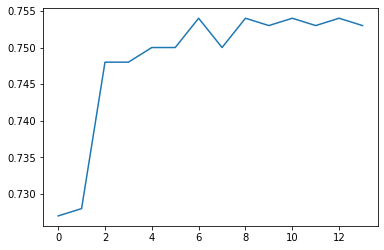

In [17]:
print(max(scores))
plt.plot(scores)

In [18]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7540000000000001
{'classifier__C': 0.1, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# 종합적인 녀석

In [38]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [39]:
df = pd.read_csv("c:/data/iris/iris_n.csv")
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [40]:
df.shape

(150, 6)

In [41]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [42]:
df['Name'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [43]:
df.groupby('Name').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Name,,,,,
setosa,5.006,3.428,1.462,0.246,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


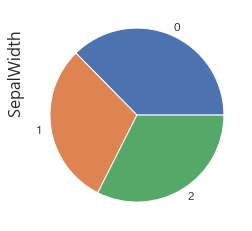

In [44]:
sums_by_species = df.groupby('Species').sum()
var = 'SepalWidth'
sums_by_species[var].plot(kind='pie', fontsize=12)
plt.ylabel(var, horizontalalignment='left')
plt.show()

         SepalLength  SepalWidth  PetalLength  PetalWidth
Species                                                  
0              250.3       171.4         73.1        12.3
1              296.8       138.5        213.0        66.3
2              329.4       148.7        277.6       101.3


<AxesSubplot:xlabel='Species'>

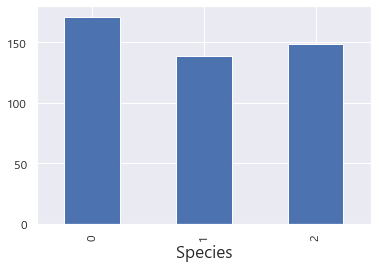

In [45]:
sums_by_species = df.groupby('Species').sum()
print(sums_by_species)
var = 'SepalWidth'
sums_by_species[var].plot(kind='bar', fontsize=12)

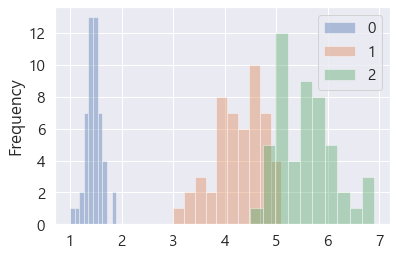

In [46]:
for spec in df['Species'].unique():
    subdf = df[df['Species'] == spec]
    subdf['PetalLength'].plot(kind='hist', alpha=0.4, label=spec)
plt.legend(loc='upper right')

In [47]:
df['Name'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: Name, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0:setosa, 1:versicolor, 2:virginica)')

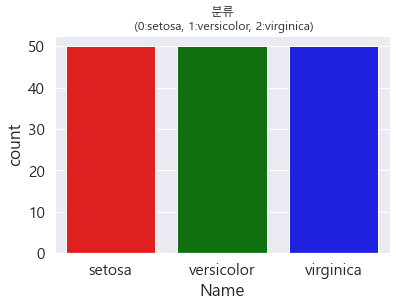

In [48]:
colors = ["red", "green", "blue"]
sns.countplot('Name', data=df, palette=colors)
plt.title('분류\n (0:setosa, 1:versicolor, 2:virginica)', fontsize=12)

In [49]:
# 로지스틱 회귀분석 모델을 위해 데이터 나누기

cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[cols]
y = df['Species']

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [62]:
print("학습용: ", model.score(X_train, y_train))
print("검증용: ", model.score(X_test, y_test))

학습용:  0.9666666666666667
검증용:  1.0


In [63]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [64]:
df_cm = pd.DataFrame(cm, index=[0,1,2],
columns=[0,1,2])
df_cm

,0,1,2
0,10,0,0
1,0,10,0
2,0,0,10


<AxesSubplot:>

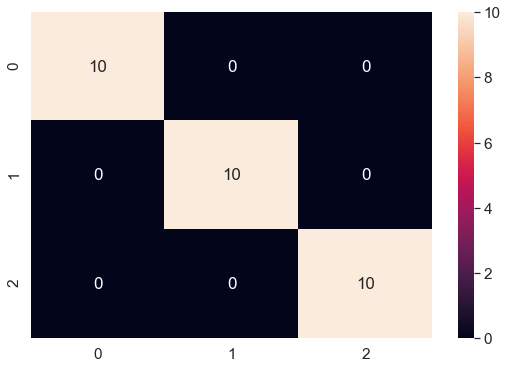

In [65]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
sns.heatmap(df_cm, annot=True)

In [66]:
flowers = ['setosa', 'versicolor', 'virginica']
X_new = [[7, 3.0, 5, 1.4]]
pred = model.predict(X_new)
print('품종 : ', flowers[pred[0]])

품종 :  versicolor


In [67]:
import joblib
joblib.dump(model, 'c:/data/iris/iris_logit.model')

['c:/data/iris/iris_logit.model']

In [ ]:
# 와인 품질 분류 / 이진분류 / sm.Logit()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


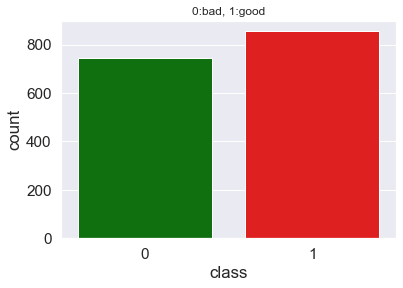

In [68]:
df = pd.read_csv("c:/data/wine/wine_new.csv")

colors = ["green", "red"]
sns.countplot('class', data=df, palette=colors)
plt.title('0:bad, 1:good', fontsize=12)
plt.show()

In [69]:
train_cols = df.columns[0:11]
print(train_cols)
X = df[train_cols]
y = df['class']

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [70]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['class'])
df2 = pd.concat([X_samp, y_samp], axis=1)

In [71]:
df2['class'].value_counts()

0    744
1    744
Name: class, dtype: int64

In [72]:
train_cols = df.columns[0:11]
X = df[train_cols]
y = df['class']

In [73]:
# 이진분류라서 sm.Logit() 사용, 멀티클래스에서는 sm.MNLogit() 사용
model = sm.Logit(y,X)
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.517798
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.250      
Dependent Variable:  class             AIC:               1677.9172  
Date:                2021-12-08 15:06  BIC:               1737.0656  
No. Observations:    1599              Log-Likelihood:    -827.96    
Df Model:            10                LL-Null:           -1104.5    
Df Residuals:        1588              LLR p-value:       1.9883e-112
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed acidity         0.0952   0.0632  1.5075 0.1317  -0.0286  0.2190
volatile acidity

In [74]:
cols = ['volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
X = X_samp[cols]
y = y_samp['class']
df2 = pd.concat([X,y], axis=1)

In [76]:
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [77]:
print("학습용: ", model.score(X_train, y_train))
print("검증용: ", model.score(X_test, y_test))

학습용:  0.746218487394958
검증용:  0.7483221476510067


In [79]:
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
df_cm

,0,1
0,122,39
1,36,101


<AxesSubplot:>

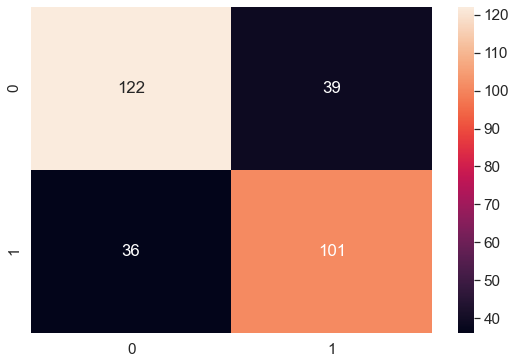

In [80]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
sns.heatmap(df_cm, annot=True, fmt="d")

In [ ]:
# 타이타닉

In [88]:
df = pd.read_csv("c:/data/titanic/train3.csv")
df.groupby("Survived").mean()

,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Survived,,,,,,,,,
0,0.145719,0.176685,0.677596,0.852459,0.147541,30.483607,0.553734,0.329690,22.117887
1,0.397661,0.254386,0.347953,0.318713,0.681287,28.595526,0.473684,0.464912,48.395408


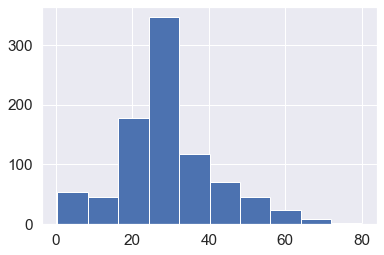

In [89]:
%matplotlib inline

df["Age"].hist()
plt.show()

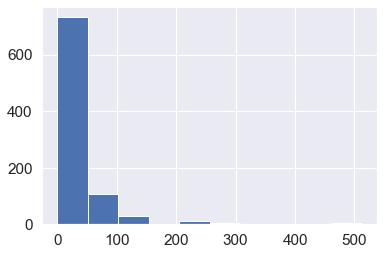

In [90]:
%matplotlib inline

df["Fare"].hist()
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


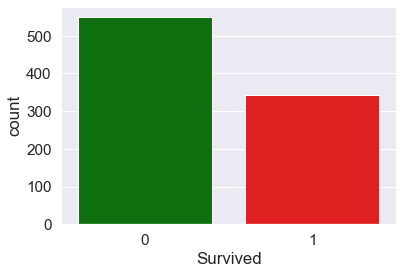

In [91]:
colors = ["green", "red"]
sns.countplot("Survived", data=df, palette=colors)
plt.show()

In [92]:
train_cols = df.columns[1:]
X = df[train_cols]
y = df["Survived"]

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Survived"])
df2 = pd.concat([X_samp, y_samp], axis=1)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


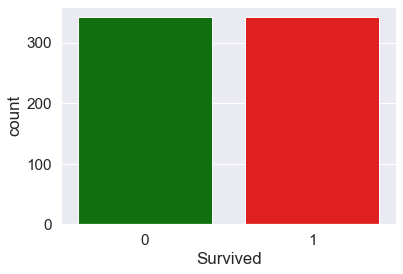

In [93]:
colors = ["green", "red"]
sns.countplot("Survived", data=df2, palette=colors)
plt.show()

In [94]:
X = X_samp[train_cols]
y = y_samp["Survived"]

In [97]:
model = sm.Logit(y,X)
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.466486
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.327     
Dependent Variable: Survived         AIC:              654.1528  
Date:               2021-12-08 15:49 BIC:              690.3765  
No. Observations:   684              Log-Likelihood:   -319.08   
Df Model:           7                LL-Null:          -474.11   
Df Residuals:       676              LLR p-value:      4.2671e-63
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass1    1.7178        nan       nan      nan       nan       nan
Pclass2    0.6262        nan       nan      nan       nan 

In [111]:
train_cols = ['Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age', 'SibSp']
X = df[train_cols]
y = df["Survived"]

model = sm.Logit(y,X)
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.443764
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.334     
Dependent Variable: Survived         AIC:              802.7878  
Date:               2021-12-08 16:02 BIC:              831.5418  
No. Observations:   891              Log-Likelihood:   -395.39   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      2.3063e-83
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass1    1.7718        nan       nan      nan       nan       nan
Pclass2    0.5805        nan       nan      nan       nan 

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
print("학습용 : ", model.score(X_train, y_train))
print("검증용 : ", model.score(X_test, y_test))

학습용 :  0.7851123595505618
검증용 :  0.7988826815642458


In [113]:
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, index=['사망','생존'], columns=['사망', '생존'])
df_cm

,사망,생존
사망,91,19
생존,17,52


C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-pack

<AxesSubplot:>

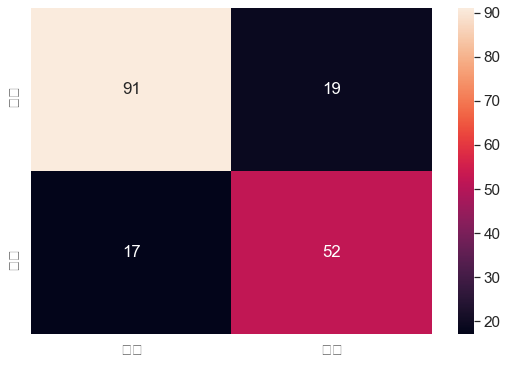

In [114]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
sns.heatmap(df_cm, annot=True)

In [117]:
import numpy as np

#'Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age', 'SibSp'

person1 = np.array([0,0,1,1,0,19,0]).reshape(1,7)
person2 = np.array([1,0,0,0,1,20,1]).reshape(1,7)
person3 = np.array([0,1,0,0,1,40,2]).reshape(1,7)
print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))

[0]
[1]
[1]


In [118]:
joblib.dump(model, 'c:/data/titanic/titanic_logit.model')

['c:/data/titanic/titanic_logit.model']

In [ ]:
# 저장한 titanic model 불러오기

In [119]:
model = joblib.load('c:/data/titanic/titanic_logit.model')

In [120]:
person1 = np.array([1,0,0,1,0,19,0]).reshape(1,7)
person2 = np.array([0,0,1,0,1,20,1]).reshape(1,7)
person3 = np.array([0,1,0,0,1,50,0]).reshape(1,7)
print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))

[1]
[1]
[1]


In [121]:
# 사망할 확률, 살아남을 확률
rate1 = model.predict_proba(person1)
print(rate1)
# 살아남을 확률을 보려면
print(rate1[0][-1])

[[0.3815991 0.6184009]]
0.6184008953672074
